In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

In [ ]:
#based on: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [2]:
#path to save the trained model
PATH = './cifar_net.pth'

In [3]:
#allocate the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.get_device_name(0))

cuda:0
NVIDIA GeForce RTX 3060


In [4]:
#define CNN
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [6]:
def train(nn, epochs=2,print_itr=2000):
    for epoch in range(epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = nn(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % print_itr == 0:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / print_itr))
                running_loss = 0.0

    print('Finished Training')

In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

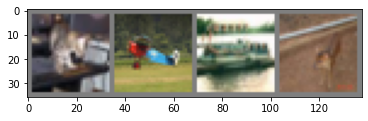

  cat plane  ship  deer


In [8]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [9]:
my_net = Net().to(device) #create a NN and send it to the GPU

In [10]:
#loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(my_net.parameters(), lr=0.001, momentum=0.9)

In [11]:
print(my_net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [19]:
train(my_net, epochs=10)

[1,     1] loss: 0.000
[1,  2001] loss: 0.938
[1,  4001] loss: 0.957
[1,  6001] loss: 0.963
[1,  8001] loss: 0.981
[1, 10001] loss: 0.984
[1, 12001] loss: 0.968
[2,     1] loss: 0.000
[2,  2001] loss: 0.888
[2,  4001] loss: 0.908
[2,  6001] loss: 0.905
[2,  8001] loss: 0.931
[2, 10001] loss: 0.937
[2, 12001] loss: 0.934
[3,     1] loss: 0.000
[3,  2001] loss: 0.854
[3,  4001] loss: 0.853
[3,  6001] loss: 0.888
[3,  8001] loss: 0.887
[3, 10001] loss: 0.919
[3, 12001] loss: 0.908
[4,     1] loss: 0.001
[4,  2001] loss: 0.808
[4,  4001] loss: 0.845
[4,  6001] loss: 0.841
[4,  8001] loss: 0.856
[4, 10001] loss: 0.870
[4, 12001] loss: 0.899
[5,     1] loss: 0.001
[5,  2001] loss: 0.779
[5,  4001] loss: 0.818
[5,  6001] loss: 0.831
[5,  8001] loss: 0.813
[5, 10001] loss: 0.857
[5, 12001] loss: 0.831
[6,     1] loss: 0.001
[6,  2001] loss: 0.750
[6,  4001] loss: 0.780
[6,  6001] loss: 0.792
[6,  8001] loss: 0.818
[6, 10001] loss: 0.805
[6, 12001] loss: 0.819
[7,     1] loss: 0.000
[7,  2001] 

In [13]:
#save the trained net
torch.save(my_net.state_dict(), PATH)

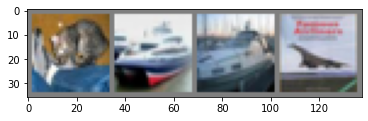

GroundTruth:    cat  ship  ship plane


In [14]:
#view 4 images with labels
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
my_net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [16]:
images, labels = images.cuda(), labels.cuda()
outputs = my_net(images)

In [17]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship plane plane


In [18]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = images.cuda(), labels.cuda()
        outputs = my_net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 75 %
